### Cleaning Data
   - #### 1. Adjust column names and dropped irrelevant columns
   - #### 2. Removing duplicates
   - #### 3. Removing Null values
   - #### 4. return  review list column to its type as list of tuples instead of string and clean it.
   - #### 5. Adjust name column
   - #### 6. Adjust column types 
   - #### 8. Clean the dish_like  column 

### Finally  Getting Insights and  Data Visualisation

In [253]:
# import the needed libraries
import numpy as np
import pandas as pd
import ast 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 10,6
#plt.xkcd()
%matplotlib inline

In [254]:
# load data to pandas dataframe
df = pd.read_csv('../zomato_indore.csv', engine='python')

In [255]:
df

Sr no.               name                  locality   latitude  \
0        0.0      Namo Sandwich              Sudama Nagar  22.696331   
1        1.0       Bake N Shake  BCM Heights, Vijay Nagar  22.755705   
2        2.0    Shree Gurukripa         Sarwate Bus Stand  22.714090   
3        3.0  Nafees Restaurant               Old Palasia  22.725712   
4        4.0   Hotel Guru Kripa         Sarwate Bus Stand  22.714086   
...      ...                ...                       ...        ...   
3098     NaN                NaN                       NaN        NaN   
3099     NaN                NaN                       NaN        NaN   
3100     NaN                NaN                       NaN        NaN   
3101     NaN                NaN                       NaN        NaN   
3102     NaN                NaN                       NaN        NaN   

      longitude                 cuisines  average_cost_for_two  \
0     75.834857                Fast Food                 500.0   
1     75.895287  Cafe, Fast Food, Bakery                 500.0   
2     75.868851             North Indian                 350.0   
3     75.887757    North Indian, Mughlai                 800.0   
4     75.868846             North Indian                 350.0   
...         ...                      ...                   ...   
3098        NaN                      NaN                   NaN   
3099        NaN                      NaN                   NaN   
3100        NaN                      NaN                   NaN   
3101        NaN                      NaN                   NaN   
3102        NaN                      NaN                   NaN   

      aggregate_rating   votes rating_text online_order book_table  \
0                  4.3   860.0   Very Good          Yes        Yes   
1                  4.2   683.0   Very Good          Yes         No   
2                  4.3  2030.0   Very Good          Yes         No   
3                  4.3  2987.0   Very Good           No         No   
4                  4.3  3441.0   Very Good           No         No   
...                ...     ...         ...          ...        ...   
3098               NaN     NaN         NaN          NaN        NaN   
3099               NaN     NaN         NaN          NaN        NaN   
3100               NaN     NaN         NaN          NaN        NaN   
3101               NaN     NaN         NaN          NaN        NaN   
3102               NaN     NaN         NaN          NaN        NaN   

                rest_type                                         dish_liked  \
0           Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1           Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2     Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3             Quick Bites                                        Masala Dosa   
4           Casual Dining                                Panipuri, Gol Gappe   
...                   ...                                                ...   
3098                  NaN                                                NaN   
3099                  NaN                                                NaN   
3100                  NaN                                                NaN   
3101                  NaN                                                NaN   
3102                  NaN                                                NaN   

                                           reviews_list listed_in(type)  
0     [('Rated 4.0', 'RATED\n  A beautiful place to ...          Buffet  
1     [('Rated 4.0', 'RATED\n  Had been here for din...          Buffet  
2     [('Rated 3.0', "RATED\n  Ambience is not that ...          Buffet  
3     [('Rated 4.0', "RATED\n  Great food and proper...          Buffet  
4     [('Rated 4.0', 'RATED\n  Very good restaurant ...          Buffet  
...                                                 ...             ...  
3098                        

In [256]:
# get some info about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 16 columns):
Sr no.                  2844 non-null float64
name                    2844 non-null object
locality                2844 non-null object
latitude                2844 non-null float64
longitude               2844 non-null float64
cuisines                2844 non-null object
average_cost_for_two    2844 non-null float64
aggregate_rating        2844 non-null float64
votes                   2844 non-null float64
rating_text             2844 non-null object
online_order            2755 non-null object
book_table              2755 non-null object
rest_type               2743 non-null object
dish_liked              1168 non-null object
reviews_list            2750 non-null object
listed_in(type)         2634 non-null object
dtypes: float64(6), object(10)
memory usage: 388.0+ KB


# Cleaning Data

In [485]:
# make a copy of our data
data = df.copy()

## 1. Adjust column names and dropped irrelevant columns

In [487]:
# drop unnecessary columns
column_to_drop = ['Sr no.']
data.drop(columns=column_to_drop, axis=1,inplace=True)

In [488]:
# rename non descriptive columns
# As per metadat 'listed_in(type)' is a type of meal
data.rename(columns={'average_cost_for_two': 'average_cost', 'listed_in(type)': 'meal_type'}, inplace=True)

In [489]:
# check the columns now
data.columns

Index(['name', 'locality', 'latitude', 'longitude', 'cuisines', 'average_cost',
       'aggregate_rating', 'votes', 'rating_text', 'online_order',
       'book_table', 'rest_type', 'dish_liked', 'reviews_list', 'meal_type'],
      dtype='object')

In [490]:
data.dropna()

name  \
0                                     Namo Sandwich   
1                                      Bake N Shake   
2                                   Shree Gurukripa   
3                                 Nafees Restaurant   
4                                  Hotel Guru Kripa   
...                                             ...   
2912                   SD 21 - Hotel Somdeep Palace   
2914         Indore Kitchen - Indore Marriott Hotel   
2919                      Constellation - Hotel WOW   
2920                    Ni Hao - Radisson Blu Hotel   
2922  Indore Baking Company - Indore Marriott Hotel   

                                locality   latitude  longitude  \
0                           Sudama Nagar  22.696331  75.834857   
1               BCM Heights, Vijay Nagar  22.755705  75.895287   
2                      Sarwate Bus Stand  22.714090  75.868851   
3                            Old Palasia  22.725712  75.887757   
4                      Sarwate Bus Stand  22.714086  75.868846   
...                                  ...        ...        ...   
2912   Hotel Somdeep Palace, Vijay Nagar  22.750035  75.903482   
2914  Indore Marriott Hotel, Vijay Nagar  22.752949  75.883409   
2919              Hotel Wow, Vijay Nagar  22.749182  75.895365   
2920     Radisson Blu Hotel, Vijay Nagar  22.750030  75.903471   
2922  Indore Marriott Hotel, Vijay Nagar  22.752877  75.883453   

                                     cuisines  average_cost  aggregate_rating  \
0                                   Fast Food         500.0               4.3   
1                     Cafe, Fast Food, Bakery         500.0               4.2   
2                                North Indian         350.0               4.3   
3                       North Indian, Mughlai         800.0               4.3   
4                                North Indian         350.0               4.3   
...                                       ...           ...               ...   
2912                    North Indian, Chinese        1100.0               4.6   
2914  North Indian, Italian, Asian, Fast Food        1800.0               4.4   
2919             North Indian, Asian, Italian        1800.0               4.2   
2920                    Asian, Chinese, Momos        1850.0               4.6   
2922                                   Bakery        1500.0               4.4   

       votes rating_text online_order book_table                   rest_type  \
0      860.0   Very Good          Yes        Yes               Casual Dining   
1      683.0   Very Good          Yes         No               Casual Dining   
2     2030.0   Very Good          Yes         No         Cafe, Casual Dining   
3     2987.0   Very Good           No         No                 Quick Bites   
4     3441.0   Very Good           No         No               Casual Dining   
...      ...         ...          ...        ...                         ...   
2912   959.0     Terbaik          Yes         No                 Quick Bites   
2914   634.0   Very Good          Yes         No                 Quick Bites   
2919   285.0   Very Good          Yes         No  Quick Bites, Beverage Shop   
2920   248.0     Terbaik          Yes        Yes               Casual Dining   
2922   197.0   Very Good          Yes        Yes               Casual Dining   

                                             dish_liked  \
0     Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1     Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2     Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                           Masala Dosa   
4                                   Panipuri, Gol Gappe   
...                                                 ...   
2912  Sea Food, Neer Dosa, Fish, Crab Sukha, Biryani...   
2914  Honey Chilli Potatoes, Nachos, Lemonade, Hakka...   
2919  Burgers, Nachos, Oreo Shake, Veg Sandwich, Veg...   
2920  Murgh Ghee Roast, Mutton Biryani, Buttermilk, ...   
2922  Past

## 2. Removing duplicates
- Removing duplicates data when the entire rows is duplicated
- As same name could be available for other meal types and hence other ratings and average cost (this is a chain restaurant)

In [491]:
# check for duplicate values
data.duplicated().sum()

273

In [492]:
# drop the duplicates
data.drop_duplicates(inplace=True)

## 3. Removing Null values

In [493]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(2)

name                 0.04
locality             0.04
latitude             0.04
longitude            0.04
cuisines             0.04
average_cost         0.04
aggregate_rating     0.04
votes                0.04
rating_text          0.04
online_order         2.86
book_table           2.86
rest_type            3.29
dish_liked          58.73
reviews_list         3.04
meal_type            7.14
dtype: float64

In [494]:
data= data[data['meal_type']!='']
data= data[data['meal_type'].astype(str).map(len) < 10]
data= data[data['meal_type'].notna()]

### Before removing null values 

> - As we notice around 50 % of data will be lost if we delete the nan values in dish_liked column
- We will keep that column for now

In [495]:
# check for unique values in the aggregate_rating column
data.aggregate_rating.unique()

array([4.3, 4.2, 4.1, 4.6, 3.9, 4.7, 4. , 4.8, 4.9, 3.8, 4.4, 4.5, 3.7,
       3.6, 3.3, 3.5, 3.4, 3.2, 3.1, 3. , 2.5, 2.9, 2.8, 2.7, 2.1, 2.2,
       2.3, 2.4, 2.6])

In [496]:
data= data[data['online_order'].astype('str').map(len) < 4]

Back to our job for deleting Null values
> - We are intersted in this analysis for the aggregate_rating and average_cost relationship , so we'll drop null values in these two columns
- But first let's have a look on the review list column
- We here are trying to save as much of our data

## 4. Adjust  review list column
> - This column appears as string instead of list of tuples
- using ast library to return it back to list and then accessing it for more and easy analysis
- extract the review text only from each tuple in each list and clear it
-  make a new column reviews_text

In [497]:
# if we check for each value type
type(data.reviews_list[0])

str

In [498]:
# return to a list of tuples
data.reviews_list = data.reviews_list.apply(lambda x: ast.literal_eval(x))

In [499]:
# check for our work now
type(data.reviews_list[0])

list

In [500]:
# check for the first input
data.reviews_list[0][0]

('Rated 4.0',
 'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.')

In [501]:
# drop null values
data.dropna(subset=['aggregate_rating', 'average_cost'],inplace=True)

In [502]:
# test for data size
data.shape

(2519, 15)

In [503]:
# check for percentage of null values 
((data.isna().sum()/data.shape[0])*100).round(2)

name                 0.00
locality             0.00
latitude             0.00
longitude            0.00
cuisines             0.00
average_cost         0.00
aggregate_rating     0.00
votes                0.00
rating_text          0.00
online_order         0.00
book_table           0.00
rest_type            0.44
dish_liked          62.45
reviews_list         0.00
meal_type            0.00
dtype: float64

## 5. Adjust name column
> To unify the name column we will make all values as titles

In [504]:
# fix the name column
data.name = data.name.apply(lambda x: x.title())

## 6. Adjust column types 
> - online_order & book_table presented as strings instead of bools (working with True/False make it easier to analyze)
- average-cost as strings instead of int
- add the cost_range column for ease of classification

In [505]:
# convert Yes/No to True/False in coumns online_order & book_table
data.online_order.replace(('Yes','No'),(True,False),inplace =True)
data.book_table.replace(('Yes','No'),(True,False),inplace =True)

In [506]:
# check for values
data.average_cost.unique()

array([ 500.,  350.,  800.,  450.,  600., 1100.,  400., 1800.,  300.,
       1200., 1500.,  900., 1400.,  100.,  200., 1000., 1950.,  750.,
        250., 1300.,  700.,  150.,  550., 2600., 2500., 2400., 2000.,
       1900., 1875., 1850., 1600.,   50.,  850.,  650.])

### Notes:
- we are going to make a new column of cost_ranges which will be as follows:
> - very cheap : 0-200
 - cheap : 200-500
 - moderate : 500-1000 
 - expensive : 1000-3000
 - very expensive : 3000-6000
- we will do the same for average_rate column, so we can get insights from categories

In [507]:
# create cost_range column
bins = [0,200, 500, 1000, 3000, 6000]
labels = ['very cheap','cheap','moderate','expensive','extra expensive']
data['cost_range']= pd.cut(data.average_cost, bins=bins,labels=labels)

In [508]:
# we will do the same for aggregate_rating column
bins =[0,2,3,4,5]
labels =['low','moderate','high','exceptional']
data['rate_range'] = pd.cut(data.aggregate_rating, bins=bins,labels=labels)

In [509]:
data.loc[:,['aggregate_rating','rate_range']]

aggregate_rating   rate_range
0                  4.3  exceptional
1                  4.2  exceptional
2                  4.3  exceptional
3                  4.3  exceptional
4                  4.3  exceptional
...                ...          ...
2918               4.5  exceptional
2919               4.2  exceptional
2920               4.6  exceptional
2921               4.3  exceptional
2922               4.4  exceptional

[2519 rows x 2 columns]

## 7. Clean the review list column 
> - After returning it back to its nature of a list of tuples, we are able now to extract the reviews text
- hope to get more insights about each restaurants from its reviewers

In [510]:
# clear the text
def clear_text(t):
    '''
    clear the input text t
    '''
    return ' '.join([i[1].replace("RATED\n  ",'') for i in t]).encode('utf8').decode('ascii',errors='replace').\
           replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower()

In [511]:
# make a new column reviews_text
data['reviews_text'] = data.reviews_list.apply(lambda x: clear_text(x))

In [512]:
# check part of reviews text for the first restaurant
data.reviews_text[0][:500]

'a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrange'

## 8. Clean the dish_like  column 

> - make it all as lowercase.
- some missing values could be extracted also from the review_list

In [513]:
data.dish_liked.nunique()

633

In [514]:
# make lower case
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [515]:
# collect the dishes' names and make a menu list for all kind of dishes
menu_list = [e.strip() for i in data.dish_liked.tolist() if isinstance(i,str) and len(i) >0 for e in i.split(',')]

# Now collect the unique dish name 
menu_set = set(menu_list)

As we now has the unique list of dishes we now could replace those with null values with some useful data

In [516]:
# the solution 
menu_set.intersection(data.reviews_text[1000].split(' '))

{'biryani', 'raita'}

Cool !!, Now we could do that for all other missing values in dish_liked column but first let's create the dish_n_review column

## 8. Create the dish_n_review  column 

> - extact the dish been reviewed from the review text

In [517]:
#creat a new column for the reviewed dish
data['dish_n_review'] = data.reviews_text.apply(lambda x: ', '.join(list(menu_set.intersection(x.split(' ')))))

In [518]:
# get sample to compare
data.query('dish_liked != dish_liked')[['dish_liked','dish_n_review']].sample(5,random_state=1)

dish_liked                      dish_n_review
226         NaN               thali, rice, biryani
2052        NaN                                   
373         NaN                               roti
1758        NaN                                   
2302        NaN  sandwich, rice, momos, manchurian

So now, we can replace this missed values from the dish_n_review

In [519]:
# fill in the missing values in dish_liked column with data from reviews
nan_index = data.query('dish_liked != dish_liked & dish_n_review == dish_n_review').index
for i in nan_index:
    data.loc[i,'dish_liked'] = data.loc[i,'dish_n_review']

- Now we can drop the menu_list & menu_set

In [520]:
del menu_list
del menu_set

In [521]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(3)

name                0.000
locality            0.000
latitude            0.000
longitude           0.000
cuisines            0.000
average_cost        0.000
aggregate_rating    0.000
votes               0.000
rating_text         0.000
online_order        0.000
book_table          0.000
rest_type           0.437
dish_liked          0.000
reviews_list        0.000
meal_type           0.000
cost_range          0.000
rate_range          0.000
reviews_text        0.000
dish_n_review       0.000
dtype: float64

> - I guess it's quiet clean now.
- It's time for the fun part of getting insights with data visualtisation

# Getting Insights

In [522]:
# plotting parameters
# set the color for all graphs
colors = ['grey' for i in range(data.locality.nunique())]
colors[0] = 'orange'

In [523]:
# collect the column with string (object type)
str_cols = [i for i in data.columns if (data[i].dtypes == object)]
# show a sample of these columns
data[str_cols].sample(5,random_state=1)

name              locality  \
1154             Cafe Xoxo           Vijay Nagar   
1275      Cafe Blue Turtle  By Pass Road (North)   
775                    D2I        Sapna Sangeeta   
1664               Smaaash        South Tukoganj   
610   The Groundbaking Co.           Vijay Nagar   

                                   cuisines rating_text      rest_type  \
1154                          Cafe, Chinese        Good  Casual Dining   
1275  Cafe, Italian, Continental, Beverages        Good    Quick Bites   
775          North Indian, Mughlai, Chinese        Good    Quick Bites   
1664                            Finger Food     Average       Delivery   
610           Pizza, Continental, Beverages   Very Good           Cafe   

                                             dish_liked  \
1154  chicken grill, fish, shawarma, rolls, tandoori...   
1275                                                      
775                                             paratha   
1664                                                      
610   mocktails, peri fries, lasagne, pizza, chicken...   

                                           reviews_list meal_type  \
1154  [(Rated 3.0, RATED\n  It is a basic restaurant...  Delivery   
1275  [(Rated 1.0, RATED\n  Horrible Food\nI ordered...  Delivery   
775   [(Rated 3.0, RATED\n  Place is situated on a r...  Dine-out   
1664  [(Rated 5.0, RATED\n  Made the Christmas speci...  Delivery   
610   [(Rated 1.0, RATED\n \n\nHorrible. Not even ki...  Dine-out   

                                           reviews_text  \
1154  it is a basic restaurant & offers value for mo...   
1275  horrible foodi ordered for masala dosa and mas...   
775   place is situated on a road side, ppl allergic...   
1664  made the christmas special  awesome plum cake ...   
610   rated horrible  not even kidding  we ordered b...   

                                          dish_n_review  
1154                                            biryani  
1275                                                     
775                                             paratha  
1664                                                     
610   pizza, tikka, manchurian, vegetarian, wings, l...

A lot of the values in these columns appeared as comma separated and contains much information behind if we split it and count each separately

In [524]:
# set a function to count the values in a comma separated string 
def clear_text_2pd(x):
    'extract the data and count it from comma separted string values in column x returns a pd.Series ready to plot'
    return pd.Series([e.strip() for i in data[data[x].notnull()][x] for e in i.split(',') if e!='[]' if i ])

### Quick insights

## Top 10 dish liked and reviewed dish in Indore

C:\Users\sid33.SINHA\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """
C:\Users\sid33.SINHA\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:12: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  if sys.path[0] == '':


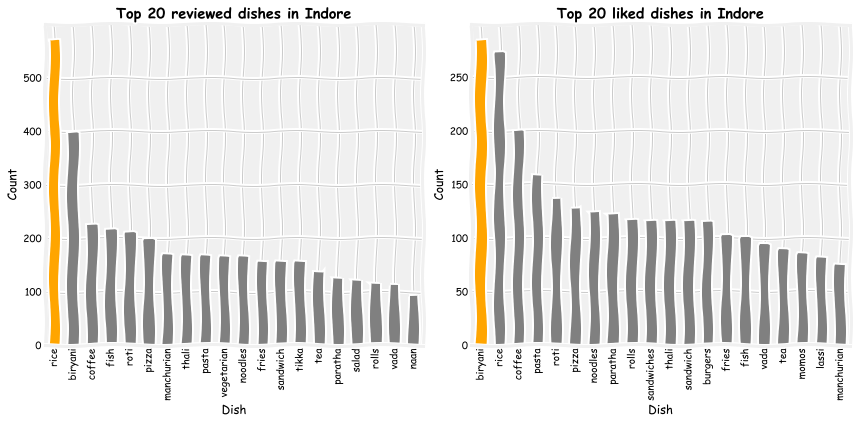

In [525]:
# plot 2 bar plots
plt.rcParams['figure.figsize'] = 12,6
plt.subplot(1,2,1)
# top 20 reviewed dishes
clear_text_2pd('dish_n_review').value_counts()[:20].plot('bar',color=colors,grid=True)
plt.title('Top 20 reviewed dishes in Indore', weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

# top 20 dish_liked
plt.subplot(1,2,2)
clear_text_2pd('dish_liked').value_counts()[:20].plot('bar',color=colors,grid=True)
plt.title('Top 20 liked dishes in Indore', weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')
plt.tight_layout();

## Top restaurants type and Top restaurant chain in Indore

C:\Users\sid33.SINHA\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


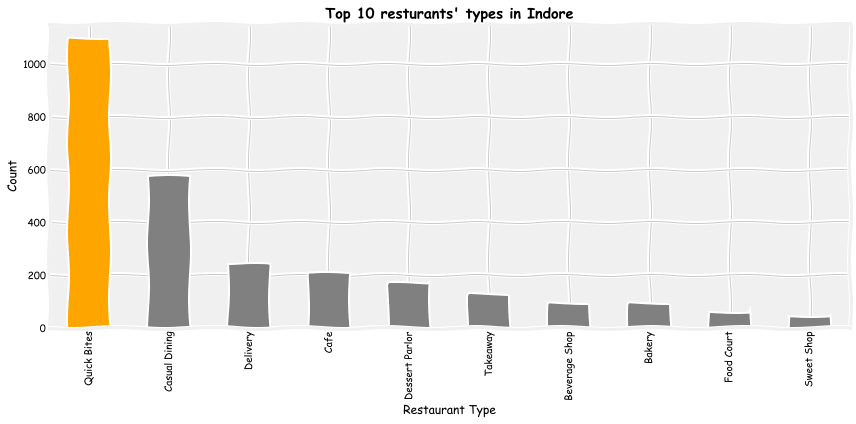

In [658]:
# plot 2 bar plots
plt.rcParams['figure.figsize'] = 12,6

# top 10 restaurants types
clear_text_2pd('rest_type').value_counts()[:10].plot('bar',color=colors,grid=True)
plt.title('Top 10 resturants\' types in Indore', weight='bold')
plt.xlabel('Restaurant Type')
plt.ylabel('Count');
plt.tight_layout();

- **Quick Bites** is the most commom restaurant type in Indore.

Business wise, one should be careful before going into **Quick Bites** restaurants as more than 1000 restaurants serve in this category !

## Top 20 cusines in Indore

C:\Users\sid33.SINHA\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


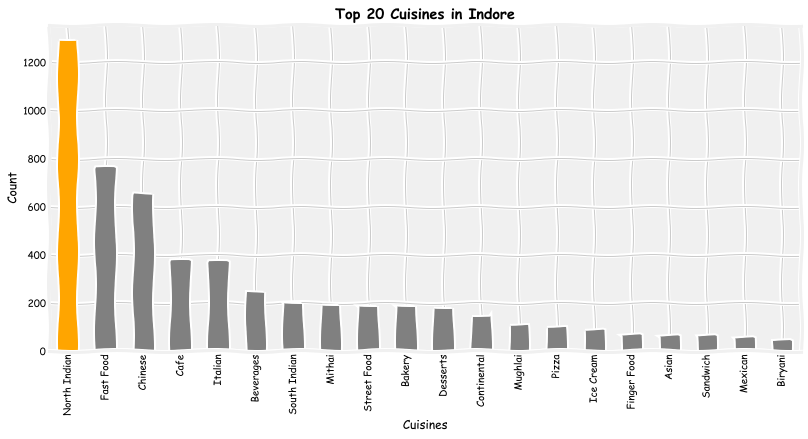

In [527]:
# top 20 cuisines
clear_text_2pd('cuisines').value_counts()[:20].plot('bar',color=colors,grid=True)
plt.title('Top 20 Cuisines in Indore', weight='bold')
plt.xlabel('Cuisines')
plt.ylabel('Count');

- As we can notice from the above chart that **North indian** at the top of cuisines provided in Indore
- Still we find some bars for Fast Food, Biryani which is not related to specific culture/ or cuisines
- Let's extract those related to country culture wise

C:\Users\sid33.SINHA\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


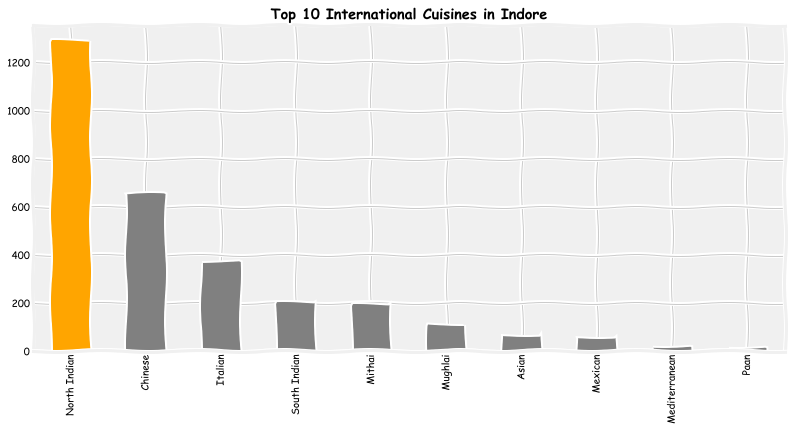

In [349]:
# collect only those related to country culture
intern_cusine = []
for i in clear_text_2pd('cuisines'):
    if i[-2:] == 'an' or i[-2:] == 'se' or i[-2:] == 'ai':
        intern_cusine.append(i)
pd.Series(intern_cusine).value_counts()[:10].plot('bar',color= colors)
plt.title('Top 10 International Cuisines in Indore',weight='bold');
del intern_cusine

> - Again **North Indian** at the top, followed by **Chinese** then **Italian**.
> - We can see different cultures from all over the world like Italian ,Asian , Mexican, Mediterranean and Mughlai
> - Highly diversified market

C:\Users\sid33.SINHA\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


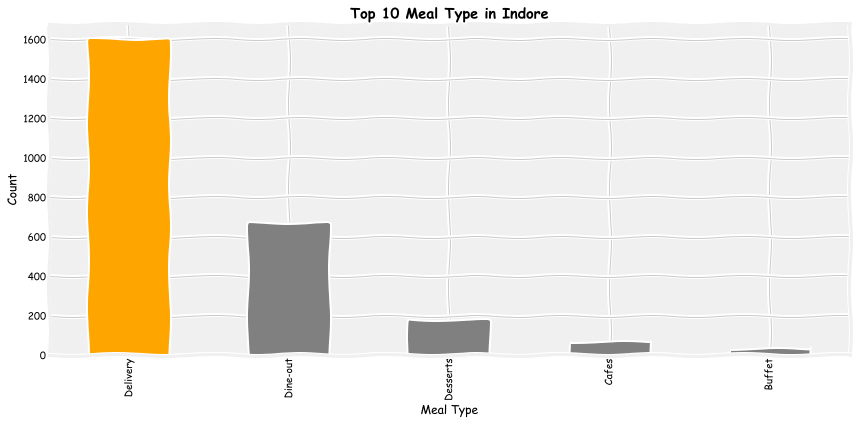

In [528]:
# plot 2 bar plots
plt.rcParams['figure.figsize'] = 12,6
# top 10 meal_type
clear_text_2pd('meal_type').value_counts()[:10].plot('bar',color=colors,grid=True)
plt.title('Top 10 Meal Type in Indore', weight='bold')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.tight_layout();

- **Delivery** meal_types is highest in Indore.

### Aggregate Rating

First as we are intersted in the **aggregate_rating** of a restaurant let's have a look about its distribution among the dataset

C:\Users\sid33.SINHA\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:11: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  # This is added back by InteractiveShellApp.init_path()


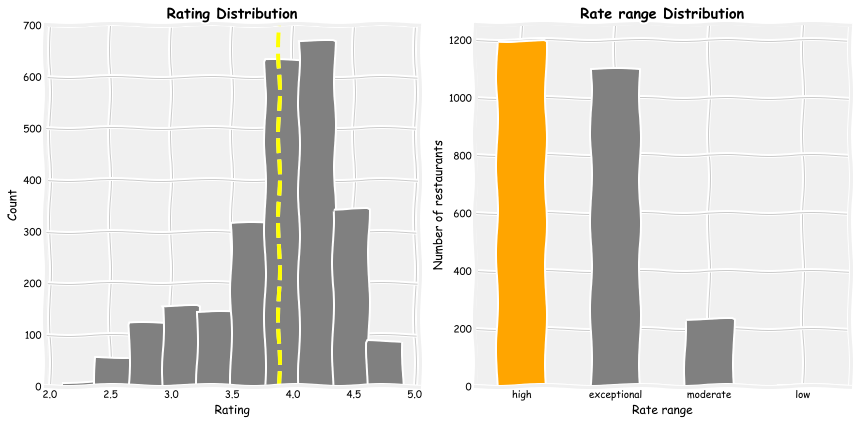

In [529]:
# histogram for restaurants average_rate
plt.rcParams['figure.figsize'] = 12,6
plt.subplot(1,2,1)
data.aggregate_rating.hist(color='grey')
plt.axvline(x= data.aggregate_rating.mean(),ls='--',color='yellow')
plt.title('Rating Distribution',weight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(1,2,2)
data.rate_range.value_counts().plot('bar',color=colors,grid=True)
plt.title('Rate range Distribution',weight='bold')
plt.xlabel('Rate range')
plt.ylabel('Number of restaurants')
plt.xticks(rotation=0)
plt.tight_layout();

> - As we notice here that it's almost normal distribution with average at **3.8**
> - The majority of restaurants rated beteen 3.5 and 4.5 (High range)

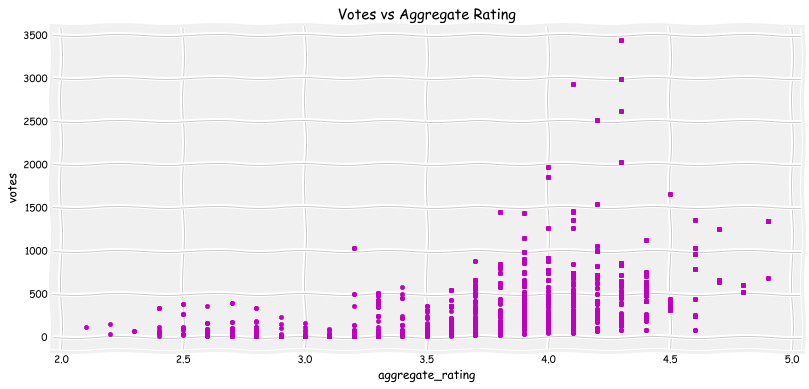

In [530]:
# votes vs rate
data.plot(kind='scatter',x='aggregate_rating',y='votes',marker='o',color='m',grid=True)
plt.title('Votes vs Aggregate Rating');

As expected that those are rated above average are likely getting higher votes

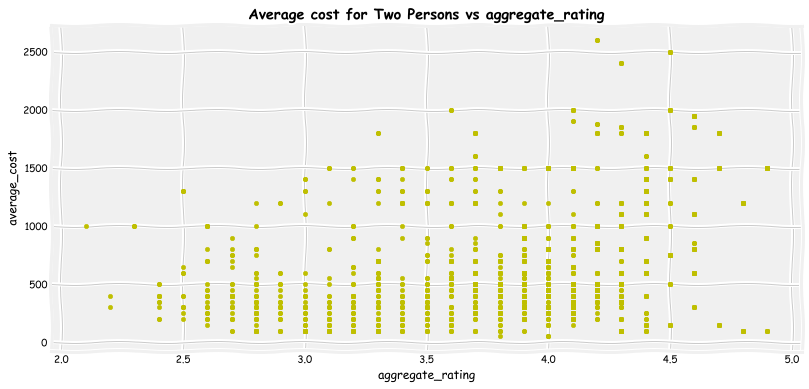

In [531]:
# votes vs rate
data.plot(kind='scatter',x='aggregate_rating',y='average_cost',marker='o',color='y',grid=True)
plt.title('Average cost for Two Persons vs aggregate_rating',weight='bold');

## **Correlation**

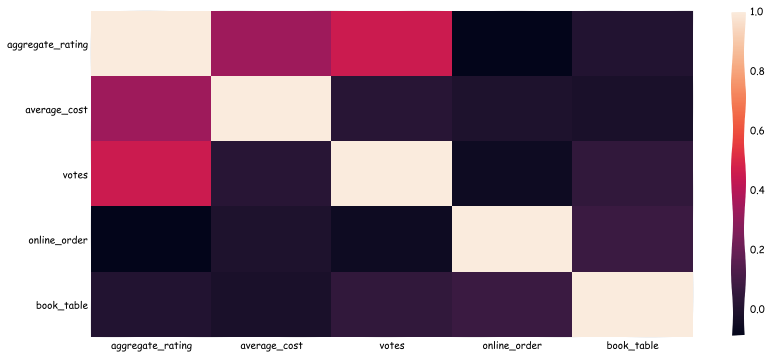

In [534]:
sns.heatmap(data[['aggregate_rating','average_cost','votes','online_order','book_table','cuisines','rating_text','rest_type','meal_type','rate_range','cost_range']].corr());

## Restaurant Distribution over locality

C:\Users\sid33.SINHA\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


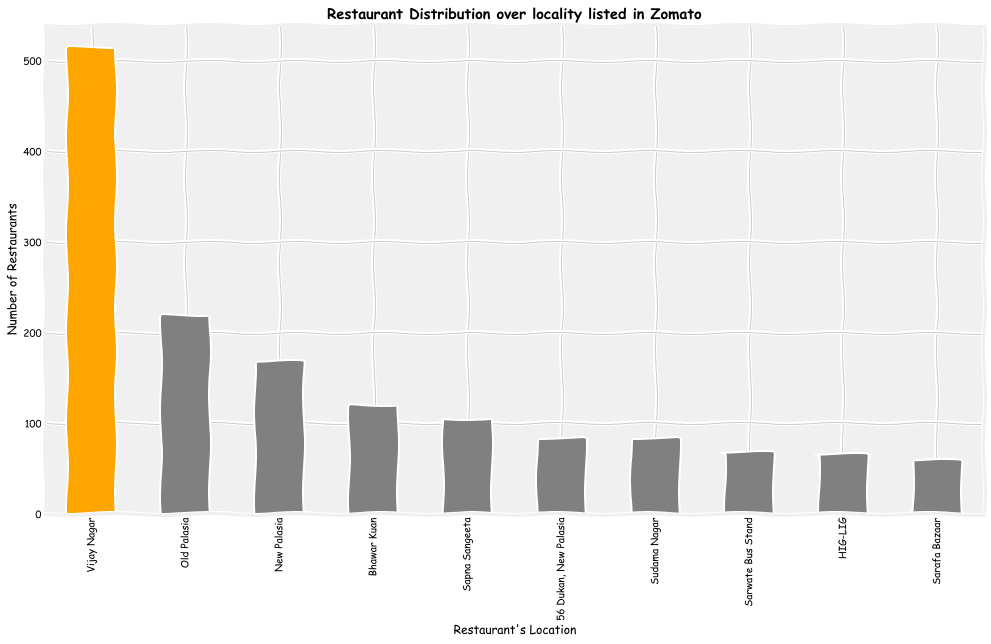

In [608]:
# location
data.locality.value_counts()[:10].plot('bar',color=colors)
plt.title('Restaurant Distribution over locality listed in Zomato',weight='bold')
plt.xlabel('Restaurant\'s Location')
plt.ylabel('Number of Restaurants');

**Vijay Nagar** has the highest number of restaurants, followed by **Old Palasia** and **New Palasia**

## Aggregate Rating co-related with Locality

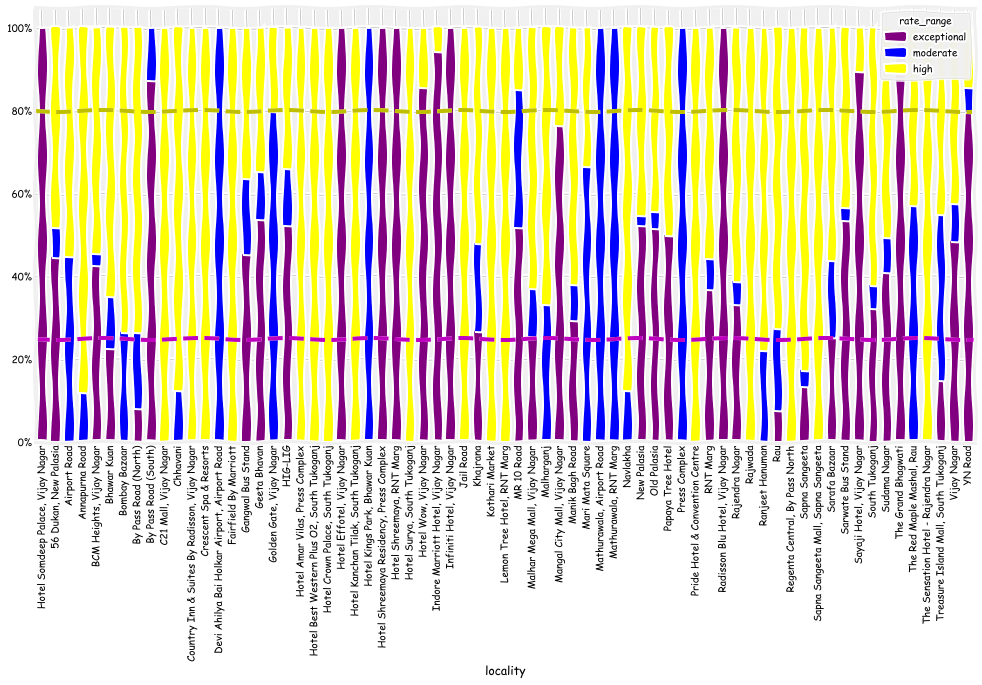

In [536]:
plt.rcParams['figure.figsize'] = 15,8;
data.groupby(['locality','rate_range']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
unstack().plot(kind='bar',stacked=True,color=['purple','blue','yellow'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.axhline(y =80 ,ls='--',color='y')
plt.axhline(y =25 ,ls='--',color='m');

> - All locations have large numbers of its restaurantas as highly rated restaurants which is matching with previous conclusion
- There are a lot of locations where around 20% of its restaurants are exceptionally rated that means above 4 out 5.
> - It's quiet clear that different locations has different rate style

### Cusine trend per Locality

In [537]:
loc_cuisine = data.groupby('locality')['cuisines'].value_counts().sort_values(ascending=False)
ind = loc_cuisine.index.levels[0]
top_cuisine , rest_count =[],[]
for i in ind:
    top_cuisine.append(loc_cuisine[i].index[0])
    rest_count.append(loc_cuisine[i][0])

In [538]:
# location's top cuisine
pd.DataFrame({'locality':ind,'top_cuisine':top_cuisine,'rest_count':rest_count})


locality  \
0      Hotel Somdeep Palace, Vijay Nagar   
1                  56 Dukan, New Palasia   
2                           Airport Road   
3                         Annapurna Road   
4               BCM Heights, Vijay Nagar   
..                                   ...   
64             The Red Maple Mashal, Rau   
65  The Sensation Hotel - Rajendra Nagar   
66  Treasure Island Mall, South Tukoganj   
67                           Vijay Nagar   
68                               YN Road   

                                      top_cuisine  rest_count  
0                           North Indian, Chinese          25  
1                                     Street Food          14  
2                                          Mithai           3  
3   Mithai, North Indian, South Indian, Beverages          11  
4                         Cafe, Fast Food, Bakery          15  
..                                            ...         ...  
64             North Indian, Chinese, Continental           3  
65                          North Indian, Chinese           1  
66             Finger Food, North Indian, Chinese           3  
67                          North Indian, Chinese          40  
68        Cafe, Continental, Italian, Street Food          17  

[69 rows x 3 columns]

- We can see in the above table that  most neighbourhoods are characterised by certain type of cuisine either North or Chinese

In [539]:
del top_cuisine 
del rest_count

### Top Dish liked  per Locality

In [540]:
from collections import Counter
loc_dish = data.groupby('locality')['dish_liked'].value_counts()
ind = loc_dish.index.levels[0]
top_dish = []
for i in ind:
    dish_counter = Counter([e.strip() for e in ','.join(loc_dish[i].index).split(',') if e])
    top_dish.append(','.join(i[0] for i in dish_counter.most_common()[:1]))

In [541]:
# location's top dish
loc_dish_df = pd.DataFrame({'locality':ind,'top_dish':top_dish})
del top_dish
loc_dish_df

locality top_dish
0      Hotel Somdeep Palace, Vijay Nagar  biryani
1                  56 Dukan, New Palasia  biryani
2                           Airport Road  biryani
3                         Annapurna Road  biryani
4               BCM Heights, Vijay Nagar   coffee
..                                   ...      ...
64             The Red Maple Mashal, Rau  biryani
65  The Sensation Hotel - Rajendra Nagar    pizza
66  Treasure Island Mall, South Tukoganj     rice
67                           Vijay Nagar     rice
68                               YN Road   coffee

[69 rows x 2 columns]

> It seems that a lot of neighbourhoods are characterised by a certain type of dish liked

## Restaurant Service Type

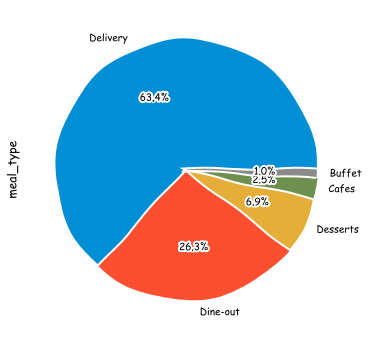

In [547]:
#check the restaurant service type

data.meal_type.value_counts().plot(kind = "pie", autopct='%.1f%%')
plt.show()

* Majority of restaurants (~>60%) provides an option of home delivery.
* ~26% of the restaurants listed on Zomato provides Dine out option

### 1. How many  restaurants have online order service & book table service?

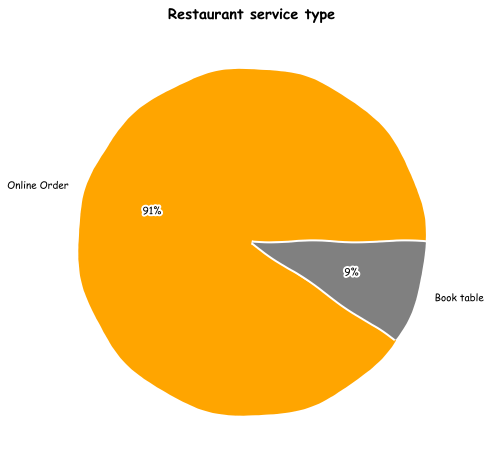

In [669]:
#plt.rcParams['figure.figsize'] = 9,6
online_order= data[data['online_order']==True]['online_order'].count()
book_table= data[data['book_table']==True]['book_table'].count()

plt.pie([online_order,book_table],colors=colors, autopct='%1.0f%%', labels=['Online Order', 'Book table'])
# add white circle to male donut plot
#w_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
#p.gca().add_artist(w_circle)
plt.title('Restaurant service type',weight ='bold');

> Its quiet clear that the majority of restaurants in our dataset has online order services but  minority with book table service, which is may due to the nature of city or general lifestyle !

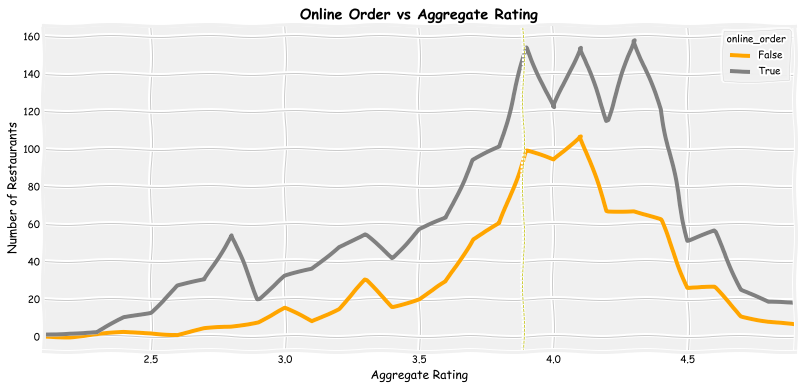

In [588]:
# collect the rate and online order columns
plt.rcParams['figure.figsize'] = 12,6
data_to_plot = pd.crosstab(data.aggregate_rating, data['online_order'])
data_to_plot.plot(grid= True,color=colors);
# set the average rate line
plt.axvline(data.aggregate_rating.mean(),color="y",linewidth=0.75,ls="--")
plt.title('Online Order vs Aggregate Rating',weight='bold')
plt.ylabel('Number of Restaurants')
plt.xlabel('Aggregate Rating');

As we notice from the above chart that having the online order service has no effect on rating the restaurants , except that we can found at the same level of rate there is higher number of restaurants that has online order serivce especially above the average rate of 3.7.

#### Where?
#### Answer:
In **Lal Balti Ki Kachori** at Jail Road, you can **order online** with highest aggregate rating of **4.0** for the **cheapest** average cost for 2 persons

In [591]:
data.query('online_order == True')[['name','aggregate_rating','average_cost','locality']].\
sort_values(by=['average_cost','aggregate_rating'],ascending=[True,False])[:1]

name  aggregate_rating  average_cost   locality
192  Lal Balti Ki Kachori               4.0          50.0  Jail Road

### 3. How the book table service affects the restaurant rate?

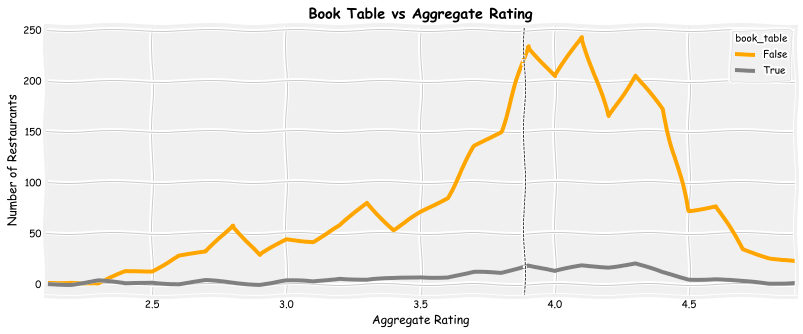

In [592]:
# collect the rate and online order columns
plt.rcParams['figure.figsize'] = 12,5
data_to_plot = pd.crosstab(data['aggregate_rating'], data['book_table'])
data_to_plot.plot(grid=True,color=colors);
# set the average rate line
plt.axvline(x=data.aggregate_rating.mean(),color="black",linewidth=0.75,ls="--")
plt.title('Book Table vs Aggregate Rating',weight='bold')
plt.ylabel('Number of Restaurants')
plt.xlabel('Aggregate Rating');

You can observe here that if your restaurant has no book table service you still have the opportunity to have a similar aggregate rating as other restaurants, that provide this service.
Most of the restaurant do not provide this service
- Note around 3.8 rating, we notice higher number of restaurants at this rate and provide book_table service

#### Where?
#### Answer:
In **Joshi Dahi Bada House** at Sarafa Bazaar, you can **book_table** with highest aggregate rating of **4.9** for the **cheapest** average cost for 2 persons

In [593]:
data.query('book_table == True')[['name','aggregate_rating','average_cost','votes','locality']].\
sort_values(by=['average_cost','votes','aggregate_rating'],ascending=[True,False,False])[:1]

name  aggregate_rating  average_cost  votes  \
2872  Joshi Dahi Bada House               4.9         100.0  686.0   

           locality  
2872  Sarafa Bazaar

## Average Rating

In [594]:
# compare book_table average rate vs all rate
print(f'Average rate for all restaurants: {round(data.aggregate_rating.mean(),2)}')
print(f"Average rate for book_table service restaurants: {round(data.query('book_table == True')['aggregate_rating'].mean(),2)}")
print(f"Average rate for online_order service restaurants: {round(data.query('online_order == True')['aggregate_rating'].mean(),2)}")
print(f"Average rate for restaurants providing both book_table and online_order service: {round(data.query('online_order == True & book_table == True')['aggregate_rating'].mean(),2)}")

Average rate for all restaurants: 3.89
Average rate for book_table service restaurants: 3.9
Average rate for online_order service restaurants: 3.85
Average rate for restaurants providing both book_table and online_order service: 3.91


## Characteristics of restaurants with book_table service

In [595]:
# set averages of votes, rates and cost in case book_table service
data.query('book_table == True')[['votes','aggregate_rating','average_cost']].mean()

votes               606.607955
aggregate_rating      3.897727
average_cost        621.590909
dtype: float64

## Characteristics of restuarants with online_order service

In [596]:
# set averages of votes, rates and cost in case online_order service
data.query('online_order == True')[['votes','aggregate_rating','average_cost']].mean()

votes               490.780095
aggregate_rating      3.851073
average_cost        656.346841
dtype: float64

- We can see that average rating of book_table service restaurant is almost **similar** to online_order restaurant.
- Thus, its **not a very important parameter** for rating, cost or number of votes !

### 4.What is the relation between cost and neighbouhood?

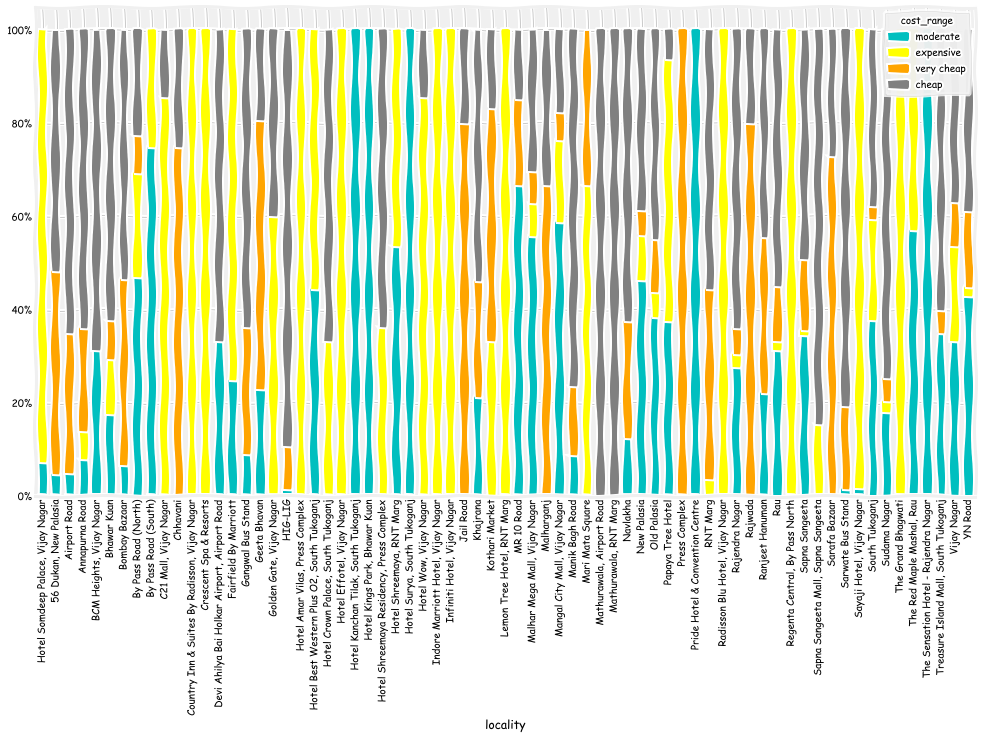

In [605]:
# location versus cost_range
plt.rcParams['figure.figsize'] = 15,9;
data.groupby(['locality','cost_range']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
unstack().plot(kind='bar',stacked=True,color=['c','yellow','orange','grey','m'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter());

In [606]:
# number of unique locations in our dataset
data.locality.nunique()

69

So crowded as we have **69** locations, but you can notice the following:
> - The majority of restaurants in the cheap price category (200-500) as average-cost for 2 persons
- Some neibourhood has style of cost range like and not limited to:
    1. -------- : 100% of resturants in the cheap region
    2. ------------: has expensive style majpority
    3. -----------: has expensive and extra expensive restuarants with little moderate and neither cheap nor very cheap
    4. ------------ : has the moderate style of cost_range 500-1000
    5. -------- : divided between very cheap and moderate    
- Likely certain locations affected by the level of population hence the costing strategy differs
To get more focus let seprate those locations to get the idea

### 5.What is the relation between votes and neighbouhood?

C:\Users\sid33.SINHA\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


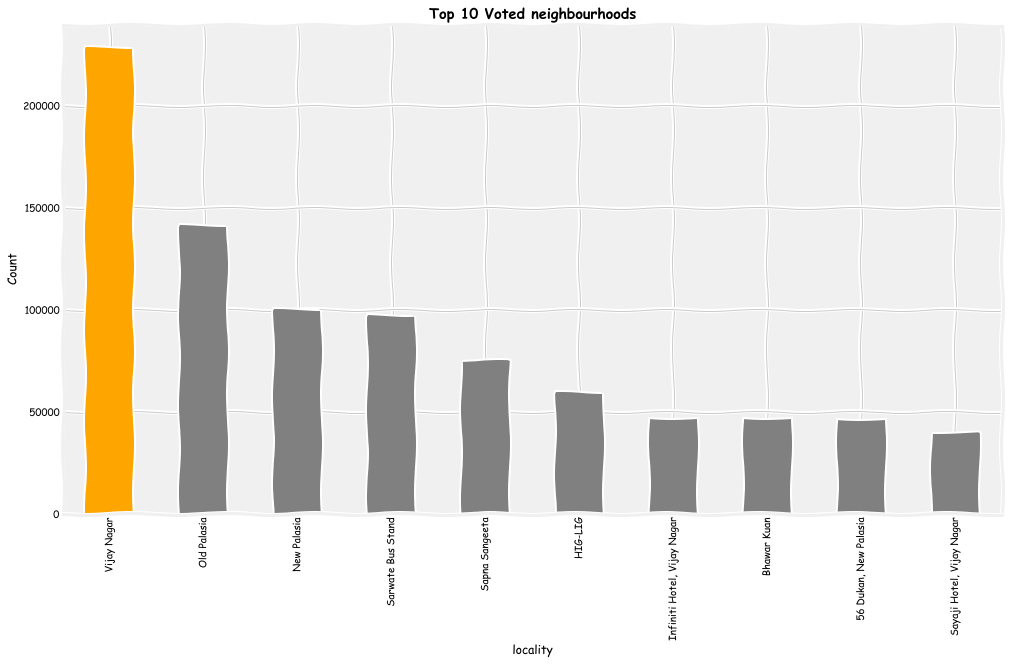

In [607]:
data.groupby('locality')['votes'].sum().sort_values(ascending=False)[:10].plot('bar',color=colors)
plt.title('Top 10 Voted neighbourhoods',weight='bold')
plt.ylabel('Count');

**Vijay Nagar** has the highest number of votes, followed by **Old Palasia** and **New Palasia**

### 7. Where one can find the best restaurants in Indore?

C:\Users\sid33.SINHA\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


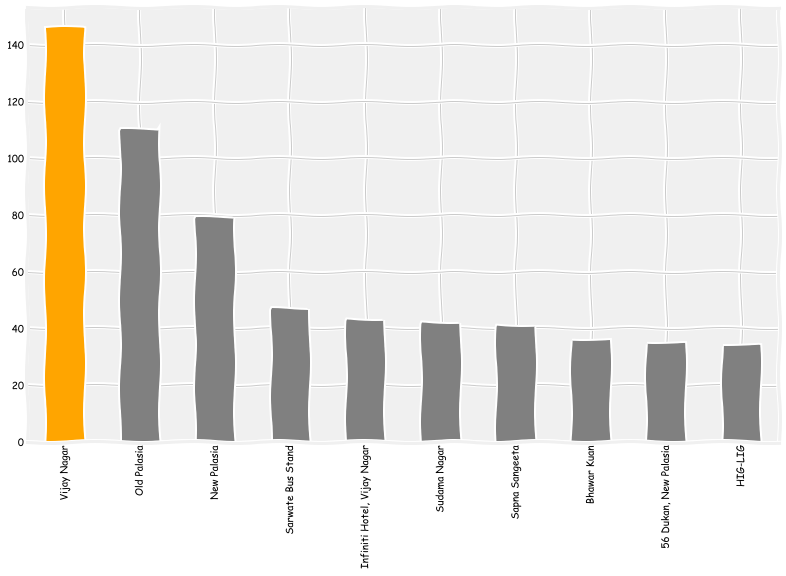

In [615]:
#rel_data.groupby('location')[['rate','votes','rest_type','average_cost']].value_counts()
plt.rcParams['figure.figsize'] = 12,8
rel_data['locality'].value_counts()[:10].sort_values(ascending=False).plot('bar',color =colors);

**Vijay Nagar** is again at the top of the list, followed by **Old Palasia** and **New Palasia**

### Average cost at this overall best restaurants?

In [617]:
# average_price from the most reliable data
rel_data['average_cost'].mean()

709.5078299776286

The average price for most appreciated restaurants is around **700** for **2 persons**

### 8.What is the relation between meal_type and locality?

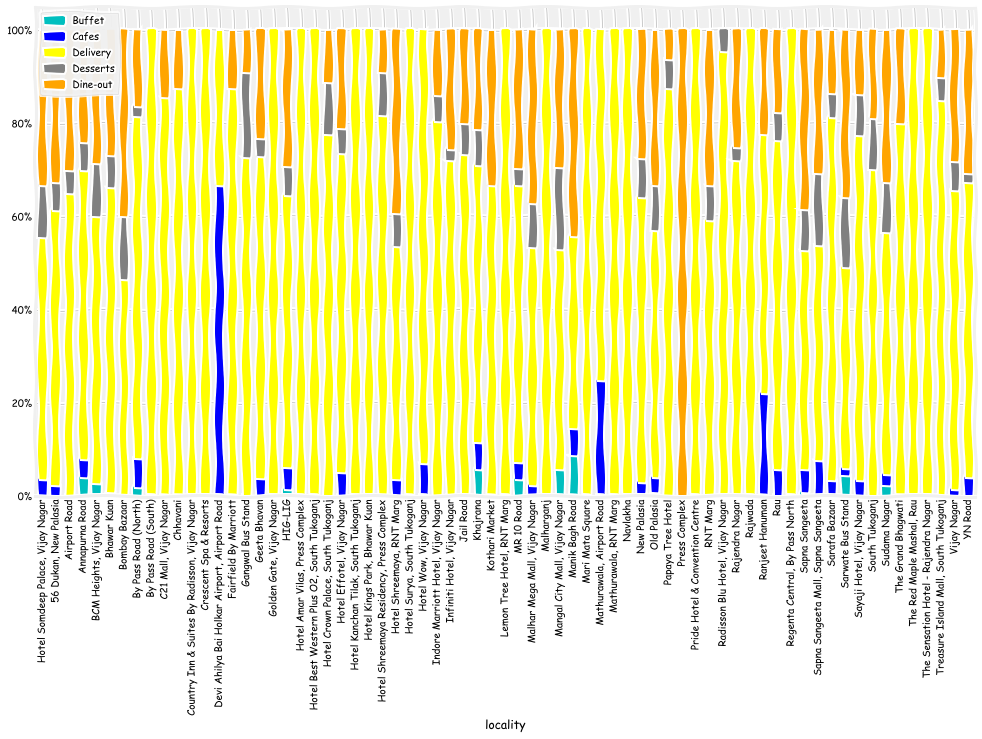

In [618]:
# location versus meal_type
plt.rcParams['figure.figsize'] = 15,9;
data.groupby(['locality','meal_type']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
unstack().plot(kind='bar',stacked=True,color=['c','b','yellow','grey','orange','black','m'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc='best');

Again here if you go through each color you will get the hint that.

Each locality has preferred meal_type like:


- **Devi Ahilya Bai Holkar Airport** and **Mathurawala** at **Airport Road** and **Ranjeet Hanuman** has higher number of **cafes**


- **Red Maple Mashal, RNT Marg, Rajwada, Geeta Bhavan, Navlakha, South Tukaganj**  has highest number of **delivery** type restaurant in Indore.


- **Press Complex, Hotel Shreemaya, Bombay Bazaar, Hotel Somdeep Palace** has highest number of **dine-out** type.


- **Manik Bhag road, Khajrana, Annapurna road, Sudama Nagar** has highest number of **Buffer** type restaurants.

### 9. What is the relation between meal type and the rating?

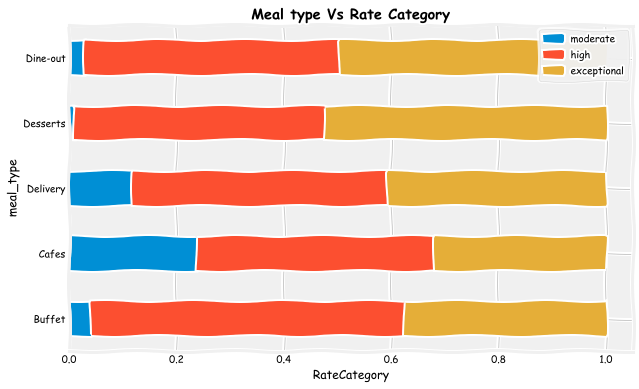

In [624]:
meal_to_rate = pd.crosstab(data['meal_type'], data['rate_range'])
plt.rcParams['figure.figsize'] = 9,6
meal_to_rate.div(meal_to_rate.sum(1).astype(float), axis = 0).plot(kind = 'barh', stacked = True)
plt.legend(loc='best')
plt.xlabel('RateCategory')
plt.title('Meal type Vs Rate Category',weight='bold');

C:\Users\sid33.SINHA\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


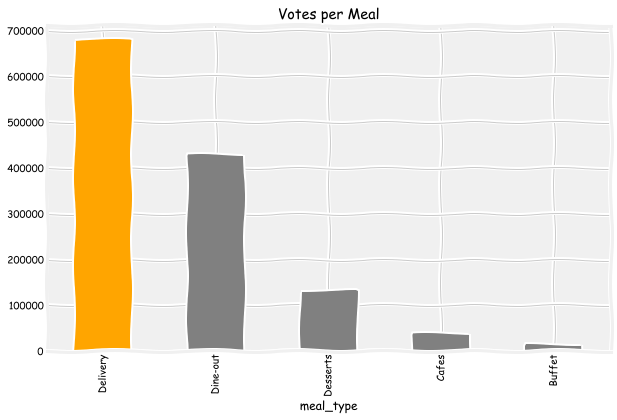

In [625]:
data.groupby('meal_type')['votes'].sum().sort_values(ascending=False).plot('bar',color=colors,title='Votes per Meal');

## Best rated, most voted restaurants, irrespective of cost

This will be as:
- has the highest possible rate , > 4.5
- has the highest number of votes as it will more reliable

In [646]:
data.query('aggregate_rating > 4.5')[['name','votes','aggregate_rating','average_cost','meal_type','locality']][:10].\
sort_values(by=['aggregate_rating','votes'],ascending=[False,False]).drop_duplicates()

name   votes  aggregate_rating  average_cost  \
22       Kebabsville - Sayaji Hotel  1346.0               4.9        1500.0   
17         The Cube - Hotel Effotel   518.0               4.8        1200.0   
56   Mustang - Hotel Somdeep Palace  1254.0               4.7        1500.0   
14          Cravings - Sayaji Hotel   658.0               4.7        1800.0   
44          Hobnob Gourmet Cafã©Bar  1028.0               4.6        1950.0   
11     Sd 21 - Hotel Somdeep Palace   959.0               4.6        1100.0   
23            Shreemaya Celebration   782.0               4.6         600.0   
102     Ni Hao - Radisson Blu Hotel   248.0               4.6        1850.0   
79                   Chang'S Legacy   237.0               4.6         800.0   

    meal_type                            locality  
22      Cafes           Sayaji Hotel, Vijay Nagar  
17      Cafes          Hotel Effotel, Vijay Nagar  
56   Delivery   Hotel Somdeep Palace, Vijay Nagar  
14      Cafes           Sayaji Hotel, Vijay Nagar  
44   Delivery         Infiniti Hotel, Vijay Nagar  
11      Cafes   Hotel Somdeep Palace, Vijay Nagar  
23      Cafes           Hotel Shreemaya, RNT Marg  
102  Delivery     Radisson Blu Hotel, Vijay Nagar  
79   Delivery                         Vijay Nagar

### 6. What are the best restaurants in Indore ?

To answer this question let's first define the best restaurant:
This will be as:
- has the highest possible rate , above average plus,
- has the highest number of votes as it will more reliable plus
- has the lowest possible cost

In [652]:
# get the average votes & rate
avg_cost = data.average_cost.mean()
avg_rate = data.aggregate_rating.mean()

# get the more reliable and relevant datapoints those with high votes , high rates and from lowest possible price
rel_data = data.query('aggregate_rating >=@avg_rate & average_cost <= @avg_cost').sort_values(['aggregate_rating', 'votes', 'average_cost']\
                                                                           ,ascending=[False,False,True])
# the top best list
rel_data[['name','aggregate_rating','votes','cuisines','average_cost','locality']][:10].drop_duplicates()

name  aggregate_rating  votes     cuisines  \
198  Joshi Dahi Bada House               4.9  686.0  Street Food   
195      Vijay Chaat House               4.8  598.0  Street Food   

     average_cost               locality  
198         100.0          Sarafa Bazaar  
195         100.0  56 Dukan, New Palasia

**Joshi Dahi Bada House** and **Vijay Chaat House** are the best **overall** restaurant in Indore !!

# Word Analysis

### Some of the most famous restaurants in Indore

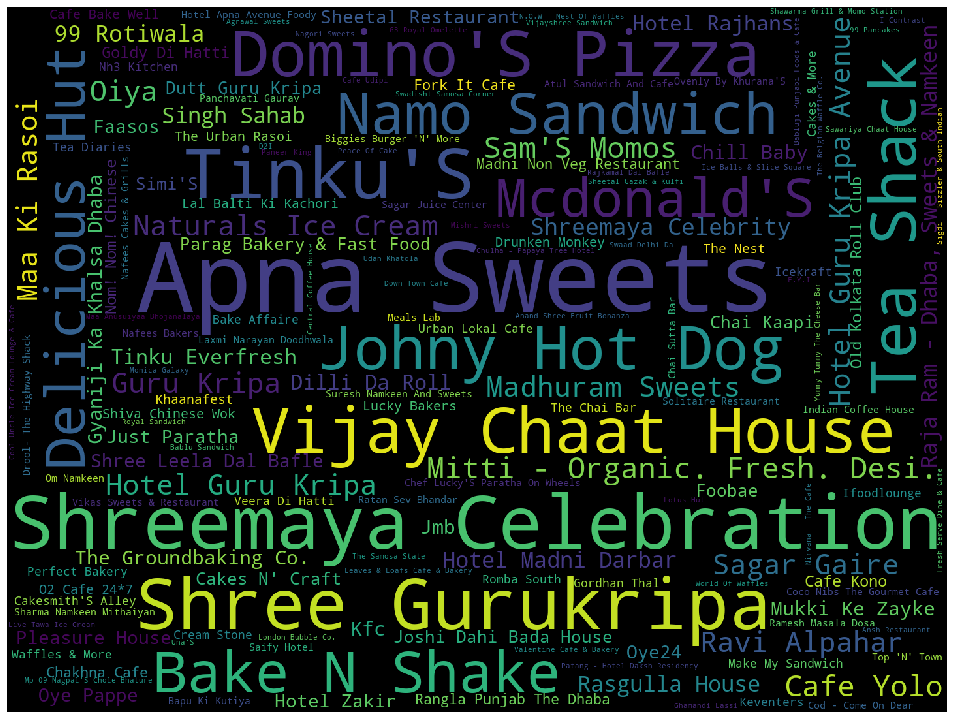

In [657]:

from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080).generate_from_frequencies(rel_data.name.value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off');

## Top 10 reliable restaurants chains

C:\Users\sid33.SINHA\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Count')

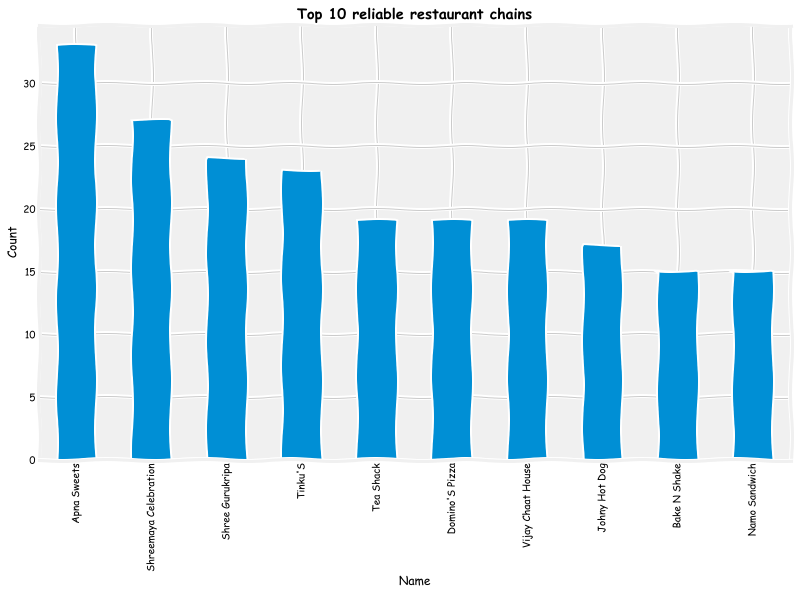

In [667]:
# top reliable chain
#plt.rcParams['figure.figsize'] = 12,8
rel_data.name.value_counts()[:10].plot('bar')
plt.title('Top 10 reliable restaurant chains',weight='bold');
plt.xlabel('Name')
plt.ylabel('Count')

The best chain restaurant with high rate, high votes and cheap prices is **Apna Sweets**

## Customer reviews

In [660]:
text = ' '.join(data.reviews_text)

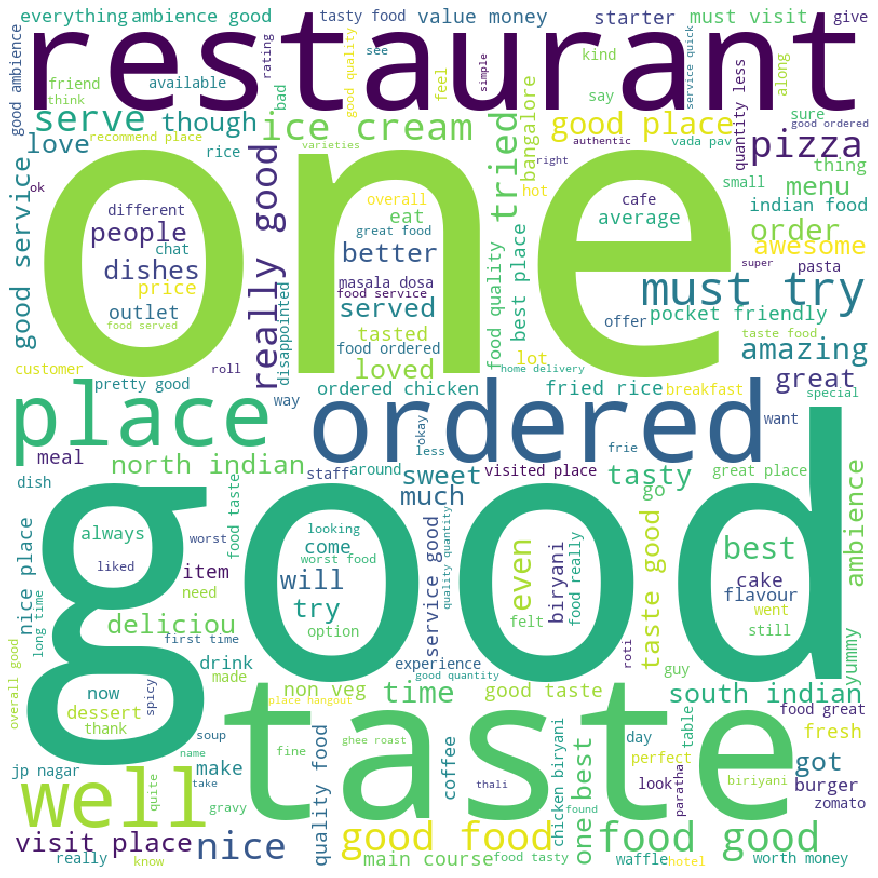

In [661]:
from wordcloud import WordCloud, STOPWORDS 
 
comment_words = ' '
stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 